In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
#Setting up the fot the dataset
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [4]:
%cd dataset2/

/content/drive/My Drive/Colab Notebooks/dataset2


In [5]:
!ls

data_dictionary.csv	summerOly_hosts.csv	    summerOly_programs.csv
summerOly_athletes.csv	summerOly_medal_counts.csv


In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("summerOly_medal_counts.csv")

In [9]:
data

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


## ARIMA模型预测

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

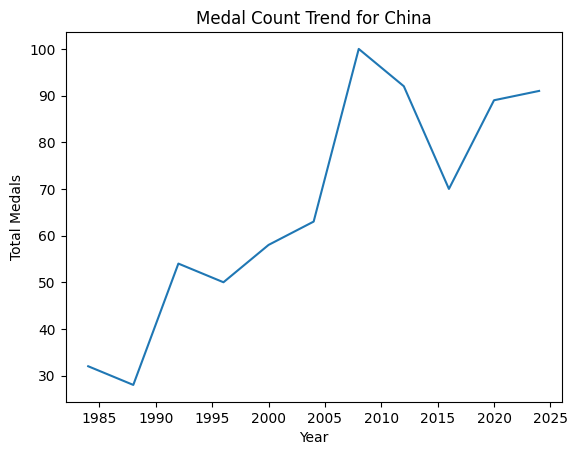

预测结果（未来6年）： 11    91.000002
12    90.999994
13    90.999995
14    90.999999
15    90.999999
16    90.999999
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [15]:
# 为每个国家选择数据进行预测
country = 'China'  # 选择一个国家（例如：中国）

# 筛选出目标国家的数据
country_data = data[data['NOC'] == country]

# 按年份排序，并使用 Total 奖牌数进行时间序列预测
country_data = country_data[['Year', 'Total']]
country_data.set_index('Year', inplace=True)

# 绘制数据趋势图
plt.plot(country_data)
plt.title(f'Medal Count Trend for {country}')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()

# 建立并训练 ARIMA 模型
model = ARIMA(country_data, order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()

# 预测未来几年奖牌数量
forecast = model_fit.forecast(steps=6)  # 预测未来6年（例如2023到2028年）

# 显示预测结果
print("预测结果（未来6年）：", forecast)

## LSTM模型

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
# 为每个国家选择数据进行预测
country = 'China'
country_data = data[data['NOC'] == country]

# 按年份排序，并使用 Total 奖牌数
country_data = country_data[['Year', 'Total']]
country_data.set_index('Year', inplace=True)

# 归一化奖牌数量
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(country_data[['Total']])

# 准备训练数据
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5  # 使用过去5年的数据预测未来
X, Y = create_dataset(scaled_data, look_back)

# 分割数据集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape 数据以适配 LSTM 输入格式
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 创建并训练 LSTM 模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(look_back, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=16, verbose=1)

# 预测未来 6 年的数据
predicted_medals = model.predict(X_test)

# 反归一化
predicted_medals = scaler.inverse_transform(predicted_medals)
print("LSTM 预测的未来奖牌数量：", predicted_medals)

NameError: name 'MinMaxScaler' is not defined

## 线性回归模型

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# 为每个国家选择数据进行预测
country = 'China'
country_data = data[data['NOC'] == country]

# 按年份排序，并使用 Total 奖牌数
country_data = country_data[['Year', 'Total']]

# 创建特征和标签
X = country_data['Year'].values.reshape(-1, 1)  # 年份作为特征
y = country_data['Total'].values  # 总奖牌数作为标签

# 拟合线性回归模型
model = LinearRegression()
model.fit(X, y)

# 预测 2028 年的奖牌数量
year_to_predict = np.array([[2028]])
predicted_medals = model.predict(year_to_predict)

print(f'预测 {country} 在 2028 年的奖牌数: {predicted_medals[0]}')

预测 China 在 2028 年的奖牌数: 104.9818181818182
